## UPDATED: Invariant mass reconstruction (One Proton Case)
Alexander van Lomwel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.special import factorial
import scipy.optimize as opt
from scipy.optimize import fsolve

Initial equation used was:
$$W(\nu_z)=\sqrt{2\left|\mathbf{p}_{\mu }\right|\left|\mathbf{p}_{\nu }\right|-2\left(\mu _x\nu _x+\mu _y\nu _y+\mu _z\nu _z\right)}$$

Updated equation, taking into account extra $\nu_z$ term in initial $\mathbf{p}_\nu$:
$$W\left(\nu _z\right)=\sqrt{2\left|\mathbf{p}_{\mu }\right|\sqrt{\nu _x^2+\nu _y^2+\nu _z^2}-2\left(\mu _x\nu _x+\mu _y\nu _y+\mu _z\nu _z\right)}$$
$$\text{Loss Function} = (80.318 - W(\nu_z))^2$$
Starting with importing data as usual

In [2]:
ro_skip = []
for i in range(0,1000):
    skip0 = 0 + i*12
    skip1 = 1 + i*12
    skip2 = 2 + i*12
    ro_skip.append(skip0)
    ro_skip.append(skip1)
    ro_skip.append(skip2)


data = pd.read_table('evrecWWmu.dat',skiprows=ro_skip,delim_whitespace=True, names=['M.C.N', 'Unknown1', 'Unknown2', 'Unknown3','Unknown4','Unknown5','Px','Py','Pz','E','M','Unknown6','Unknown7'])

## Cutting the unnecessary values ##
data = data.loc[:, ~data.columns.isin(['Unknown1', 'Unknown2', 'Unknown3', 'Unknown4', 'Unknown5', 'Unknown6', 'Unknown7'])]
data

,M.C.N,Px,Py,Pz,E,M
0,2212,-0.121187,-0.107579,6441.689670,6441.689740,9.382720e-01
1,2212,0.002975,0.016852,-6040.814950,6040.815020,9.382720e-01
2,93,0.118212,0.090726,-400.874725,517.495236,3.272625e+02
3,24,-16.241844,-60.069347,-403.188810,415.793605,8.031800e+01
4,-24,16.360056,60.160073,2.314085,101.701632,8.031800e+01
...,...,...,...,...,...,...
8995,-24,-47.147039,-84.337639,64.643653,141.299199,8.031800e+01
8996,-14,27.185437,94.311133,383.002563,395.379060,4.672031e-06
8997,13,19.663434,-9.560594,36.150860,42.248686,1.056600e-01
8998,14,-10.673811,1.939353,44.084532,45.399750,5.331201e-07


In [3]:
## Locating an event ##
event_name = {}
for x in range(1,1001):
    event_name["event{0}".format(x)] = ()

In [4]:
start_point = 0
end_point = 9

for name in event_name:
            
        globals()[name] = data.iloc[start_point:end_point].reset_index(drop=True)
        
        start_point = start_point + 9        
        end_point = start_point +9

### Pz neutrino reconstruction (no smearing)

In [5]:
pzrecon = np.empty((0,3), int)
pzmsure = np.empty((0,3), int)

for y in range(1,1001):
    ##Px##
    neutrinoPx = - globals()[f'event{y}'].Px[6] - globals()[f'event{y}'].Px[7] - globals()[f'event{y}'].Px[8]
    ##Py##
    neutrinoPy = - globals()[f'event{y}'].Py[6] - globals()[f'event{y}'].Py[7] - globals()[f'event{y}'].Py[8]
    ##Magnitude of muon momentum##
    p_muon = np.sqrt(globals()[f'event{y}'].Px[6]**2 + 
                     globals()[f'event{y}'].Py[6]**2 + 
                     globals()[f'event{y}'].Pz[6]**2)
    
    ##Defining the invariant mass eqn##
    def W(vz):
        return abs(np.sqrt(2*p_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)-2*(globals()[f'event{y}'].Px[6]*neutrinoPx+globals()[f'event{y}'].Py[6]*neutrinoPy+globals()[f'event{y}'].Pz[6]*vz)))
    
    ##Loss function to be minimised##
    def LF(vz):
        return (80.318 - W(vz))**2
    
    print("V_z reconstructed (GeV)", opt.minimize(LF,globals()[f'event{y}'].Pz[5]).x, "actual is (GeV)",globals()[f'event{y}'].Pz[5],"for event",y)
    
    pzrecon = np.append(pzrecon,opt.minimize(LF,globals()[f'event{y}'].Pz[5]).x)
    pzmsure = np.append(pzmsure,globals()[f'event{y}'].Pz[5])
    



V_z reconstructed (GeV) [-347.96725096] actual is (GeV) -347.459313 for event 1
V_z reconstructed (GeV) [-26.31466663] actual is (GeV) -26.5114289 for event 2
V_z reconstructed (GeV) [-755.25384712] actual is (GeV) -761.586622 for event 3
V_z reconstructed (GeV) [-84.09119168] actual is (GeV) -85.0004735 for event 4
V_z reconstructed (GeV) [272.68936507] actual is (GeV) 285.414183 for event 5
V_z reconstructed (GeV) [14.49241186] actual is (GeV) 14.3073037 for event 6
V_z reconstructed (GeV) [674.15172622] actual is (GeV) 674.758869 for event 7
V_z reconstructed (GeV) [324.42352649] actual is (GeV) 326.265119 for event 8
V_z reconstructed (GeV) [-408.57297539] actual is (GeV) -406.468727 for event 9
V_z reconstructed (GeV) [8.35417846] actual is (GeV) 8.31658121 for event 10
V_z reconstructed (GeV) [916.36209623] actual is (GeV) 910.820119 for event 11
V_z reconstructed (GeV) [-144.86957707] actual is (GeV) -145.271333 for event 12
V_z reconstructed (GeV) [17.0852835] actual is (GeV) 1

The rms of the distribution is  7.806370272192077


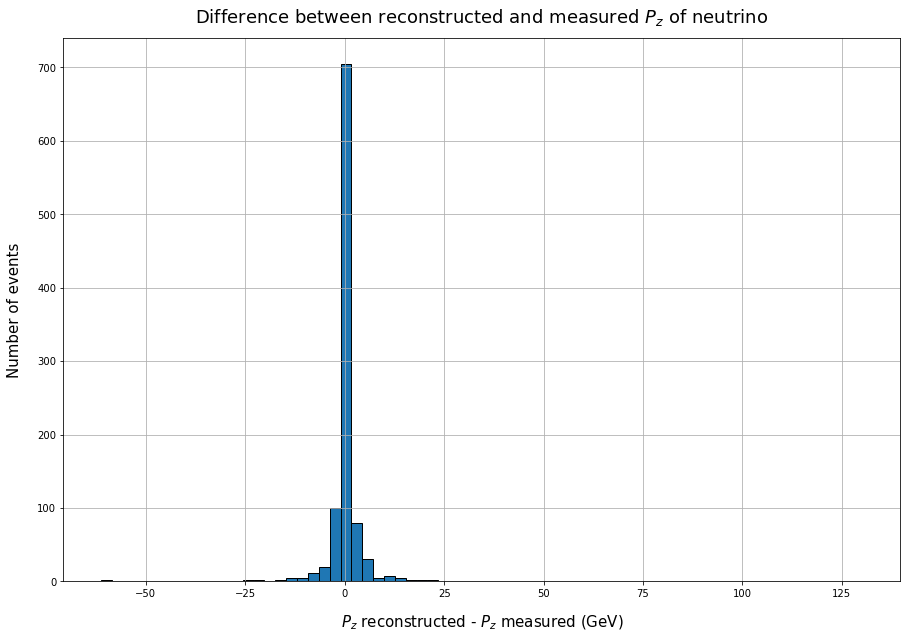

In [6]:
##Histogram of distribution##
diffpz = pzrecon-pzmsure
plt.figure(figsize=[15,10])
plt.hist(diffpz,bins = 70, ec='black')
plt.grid(True)
plt.xlabel("$P_z$ reconstructed - $P_z$ measured (GeV)",labelpad = 15, size= 15)
plt.ylabel("Number of events",labelpad = 15, size= 15)
plt.title("Difference between reconstructed and measured $P_z$ of neutrino",pad = 15, size= 18);
rms = np.sqrt(np.mean(diffpz**2)) # rms of the distribution
print("The rms of the distribution is ", rms)

[11.08951818]


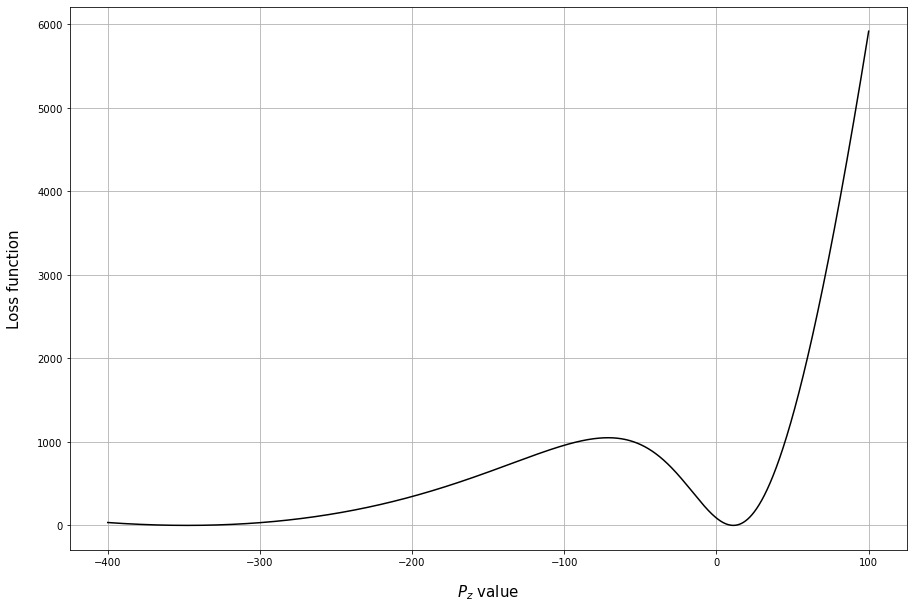

In [7]:
## EVENT 1 TEST ##
vzrange = np.linspace(-400,100,100000)

## INFO FOR EVENT 1 ##
neutrinoPx = - globals()[f'event{1}'].Px[6] - globals()[f'event{1}'].Px[7] - globals()[f'event{1}'].Px[8] 
neutrinoPy = - globals()[f'event{1}'].Py[6] - globals()[f'event{1}'].Py[7] - globals()[f'event{1}'].Py[8]
testp_muon = np.sqrt(globals()[f'event{1}'].Px[6]**2 + globals()[f'event{1}'].Py[6]**2 + globals()[f'event{1}'].Pz[6]**2)

def testLF(vz):
    return (80.318 - np.sqrt(2*testp_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)-2*(globals()[f'event{1}'].Px[6]*neutrinoPx+globals()[f'event{1}'].Py[6]*neutrinoPy+globals()[f'event{1}'].Pz[6]*vz)))**2

plt.figure(figsize=[15,10])
plt.plot(vzrange,testLF(vzrange),color="black")
plt.xlabel("$P_z$ value",labelpad = 15, size= 15)
plt.ylabel("Loss function",labelpad = 15, size= 15)
plt.grid(True);

optimise_res = opt.minimize(testLF,0, method = "CG")
print(optimise_res.x)

### Now with W boson mass smearing ###

In [10]:
w = np.random.normal(80.318,2) #smearing 
print(w)

79.83361725252216


In [11]:
pzrecon = np.empty((0,3), int)
pzmsure = np.empty((0,3), int)

for y in range(1,1001):
    ##Px##
    neutrinoPx = - globals()[f'event{y}'].Px[6] - globals()[f'event{y}'].Px[7] - globals()[f'event{y}'].Px[8]
    ##Py##
    neutrinoPy = - globals()[f'event{y}'].Py[6] - globals()[f'event{y}'].Py[7] - globals()[f'event{y}'].Py[8]
    ##Magnitude of muon momentum##
    p_muon = np.sqrt(globals()[f'event{y}'].Px[6]**2 + globals()[f'event{y}'].Py[6]**2 + globals()[f'event{y}'].Pz[6]**2)
    
    ##Defining the invariant mass eqn##
    def W(vz):
        return abs(np.sqrt(2*p_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)-2*(globals()[f'event{y}'].Px[6]*neutrinoPx+globals()[f'event{y}'].Py[6]*neutrinoPy+globals()[f'event{y}'].Pz[6]*vz)))
    
    ##Loss function to be minimised##
    def LF(vz):
        return (w - W(vz))**2
    
    print("V_z reconstructed (GeV)", opt.minimize(LF,globals()[f'event{y}'].Pz[5]).x, "actual is (GeV)",globals()[f'event{y}'].Pz[5],"for event",y)
    
    
    pzrecon = np.append(pzrecon,opt.minimize(LF,globals()[f'event{y}'].Pz[5]).x)
    pzmsure = np.append(pzmsure,globals()[f'event{y}'].Pz[5])

V_z reconstructed (GeV) [-343.79426341] actual is (GeV) -347.459313 for event 1
V_z reconstructed (GeV) [-26.69489086] actual is (GeV) -26.5114289 for event 2
V_z reconstructed (GeV) [-764.91846362] actual is (GeV) -761.586622 for event 3
V_z reconstructed (GeV) [-86.80131197] actual is (GeV) -85.0004735 for event 4
V_z reconstructed (GeV) [278.061033] actual is (GeV) 285.414183 for event 5
V_z reconstructed (GeV) [13.96387229] actual is (GeV) 14.3073037 for event 6
V_z reconstructed (GeV) [649.61285096] actual is (GeV) 674.758869 for event 7
V_z reconstructed (GeV) [317.93083678] actual is (GeV) 326.265119 for event 8
V_z reconstructed (GeV) [-425.03857751] actual is (GeV) -406.468727 for event 9
V_z reconstructed (GeV) [9.71406522] actual is (GeV) 8.31658121 for event 10
V_z reconstructed (GeV) [808.6212464] actual is (GeV) 910.820119 for event 11
V_z reconstructed (GeV) [-143.1033615] actual is (GeV) -145.271333 for event 12
V_z reconstructed (GeV) [21.60467983] actual is (GeV) 17.2

The rms of the distribution is  17.688039672390943


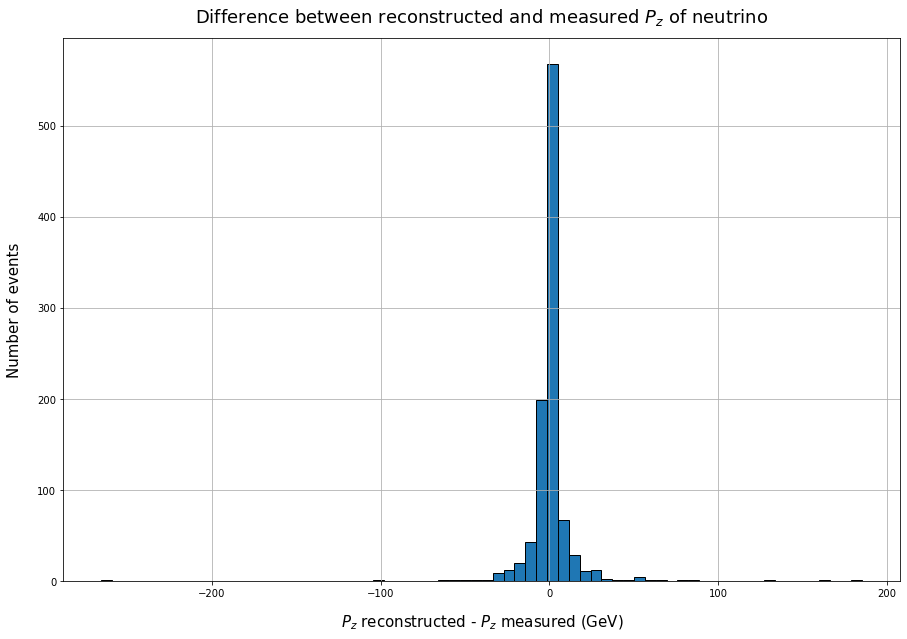

In [12]:
diffpz = pzrecon-pzmsure
plt.figure(figsize=[15,10])
plt.hist(diffpz,bins = 70, ec='black')
plt.grid(True)
plt.xlabel("$P_z$ reconstructed - $P_z$ measured (GeV)",labelpad = 15, size= 15)
plt.ylabel("Number of events",labelpad = 15, size= 15)
plt.title("Difference between reconstructed and measured $P_z$ of neutrino",
          pad = 15, size= 18);
rms = np.sqrt(np.mean(diffpz**2)) # rms of the distribution
print("The rms of the distribution is ", rms)

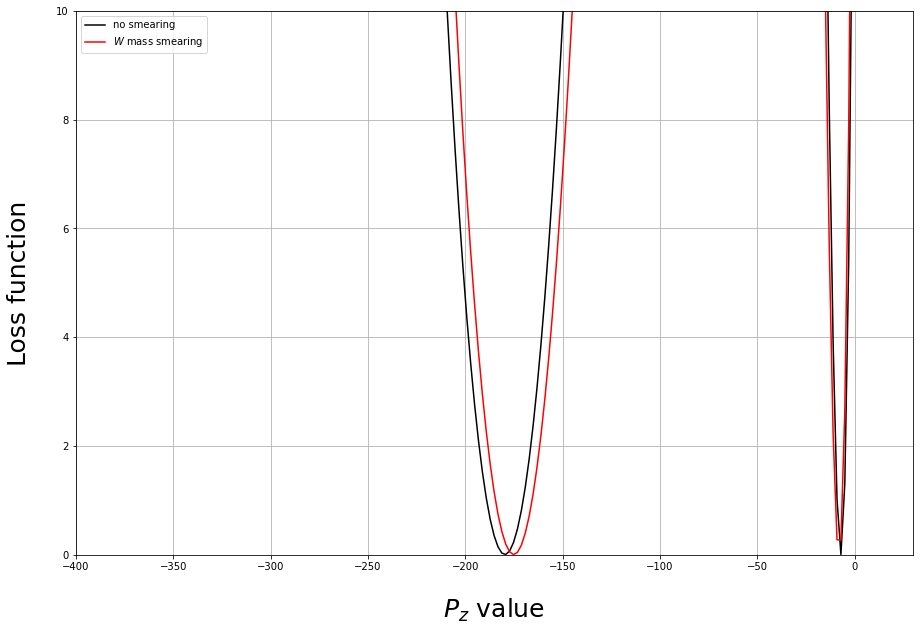

In [13]:
## EVENT 1 TEST ##
vzrange = np.linspace(-1000,1000,1000)

## INFO FOR EVENT 1 ##
neutrinoPx = - globals()[f'event{1}'].Px[6] - globals()[f'event{1}'].Px[7] 
- globals()[f'event{1}'].Px[8] 
neutrinoPy = - globals()[f'event{1}'].Py[6] - globals()[f'event{1}'].Py[7] 
- globals()[f'event{1}'].Py[8]
testp_muon = np.sqrt(globals()[f'event{1}'].Px[6]**2 + 
                     globals()[f'event{1}'].Py[6]**2 + 
                     globals()[f'event{1}'].Pz[6]**2)

def testLF(vz):
    return (80.318 - np.sqrt(2*testp_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2
                                                  +vz**2)
                             -2*(globals()[f'event{1}'].Px[6]*neutrinoPx+
                                 globals()[f'event{1}'].Py[6]*neutrinoPy+
                                 globals()[f'event{1}'].Pz[6]*vz)))**2

def testLF2(vz):
    return (w - np.sqrt(2*testp_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)
                        -2*(globals()[f'event{1}'].Px[6]*neutrinoPx+
                            globals()[f'event{1}'].Py[6]*neutrinoPy+
                            globals()[f'event{1}'].Pz[6]*vz)))**2


plt.figure(figsize=[15,10])
plt.plot(vzrange,testLF(vzrange),color="black",label="no smearing")
plt.plot(vzrange,testLF2(vzrange),color="red", label="$W$ mass smearing")
plt.xlabel("$P_z$ value",labelpad = 25, size= 25)
plt.ylabel("Loss function",labelpad = 25, size= 25)
plt.grid(True)
plt.xlim(-400,30)
plt.ylim(0,10)
plt.legend();

### Reconstructing the leptonically decaying W with smearing

Re-run the randomiser cell to reset the W smearing

In [15]:
##Reconstructing the W##
reconWx = np.empty((0,3), int)
reconWy = np.empty((0,3), int)
reconWz = np.empty((0,3), int)
reconWxtrue = np.empty((0,3), int)
reconWytrue = np.empty((0,3), int)
reconWztrue = np.empty((0,3), int)

for y in range(1,1001):
    ##Px##
    neutrinoPx = - globals()[f'event{y}'].Px[6] - globals()[f'event{y}'].Px[7] - globals()[f'event{y}'].Px[8]
    ##Py##
    neutrinoPy = - globals()[f'event{y}'].Py[6] - globals()[f'event{y}'].Py[7] - globals()[f'event{y}'].Py[8]
    ##Magnitude of muon momentum##
    p_muon = np.sqrt(globals()[f'event{y}'].Px[6]**2 + globals()[f'event{y}'].Py[6]**2 + globals()[f'event{y}'].Pz[6]**2)
    
    ##Defining the invariant mass eqn##
    def W(vz):
        return abs(np.sqrt(2*p_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)-2*(globals()[f'event{y}'].Px[6]*neutrinoPx+globals()[f'event{y}'].Py[6]*neutrinoPy+globals()[f'event{y}'].Pz[6]*vz)))
    
    ##Loss function to be minimised##
    def LF(vz):
        return (80.318 - W(vz))**2
    
    ##Reconstructing the W by momentum cons##
    reconW_x = neutrinoPx + globals()[f'event{y}'].Px[6]
    reconW_y = neutrinoPy + globals()[f'event{y}'].Py[6]
    reconW_z = opt.minimize(LF,globals()[f'event{y}'].Pz[5]).x + globals()[f'event{y}'].Pz[6]
    print("first try is",reconW_z,"for event", y, "actual is", globals()[f'event{y}'].Pz[3])
    
    ##filling arrays as usual##
    reconWx = np.append(reconWx,reconW_x)
    reconWy = np.append(reconWy,reconW_y)
    reconWz = np.append(reconWz,reconW_z)
    reconWxtrue = np.append(reconWxtrue,globals()[f'event{y}'].Px[3])
    reconWytrue = np.append(reconWytrue,globals()[f'event{y}'].Py[3])
    reconWztrue = np.append(reconWztrue,globals()[f'event{y}'].Pz[3])

first try is [-403.69674826] for event 1 actual is -403.18881
first try is [-302.20532563] for event 2 actual is -302.402088
first try is [-1576.94831712] for event 3 actual is -1583.28109
first try is [-226.81767068] for event 4 actual is -227.726953
first try is [1206.34310007] for event 5 actual is 1219.06792
first try is [-32.98002624] for event 6 actual is -33.1651343
first try is [739.80033612] for event 7 actual is 740.407479
first try is [354.67438279] for event 8 actual is 356.515976
first try is [-619.96919739] for event 9 actual is -617.864949
first try is [52.07220146] for event 10 actual is 52.0346042
first try is [1090.20420523] for event 11 actual is 1084.66223
first try is [-144.27224186] for event 12 actual is -144.673998
first try is [50.4207515] for event 13 actual is 50.5772443
first try is [-123.79579092] for event 14 actual is -123.921226
first try is [-428.55318836] for event 15 actual is -438.616368
first try is [-503.38299181] for event 16 actual is -503.423564

The rms of the distribution is  7.806370232419492


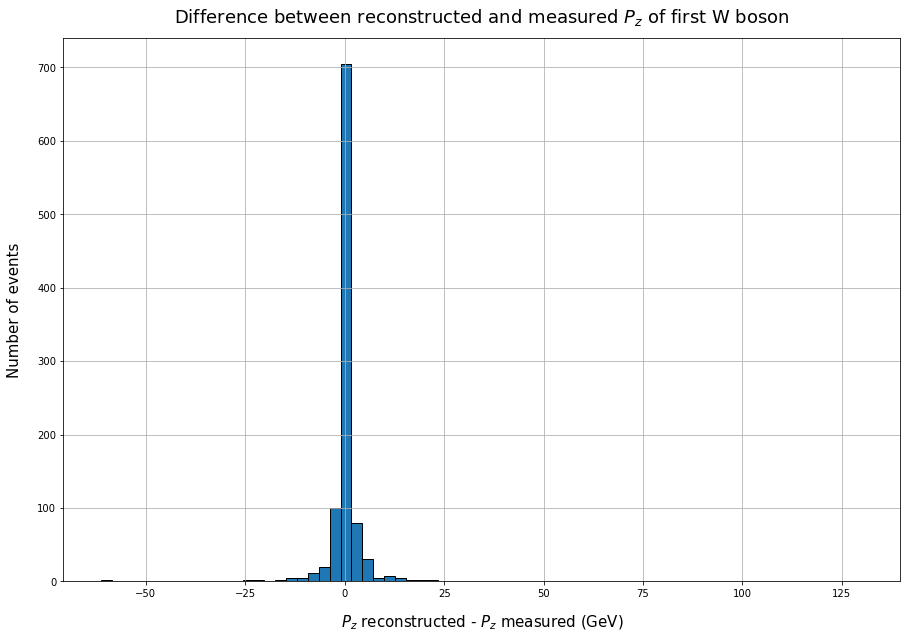

In [142]:
diffpz = reconWz-reconWztrue
plt.figure(figsize=[15,10])
plt.hist(diffpz,bins = 70, ec='black')
plt.grid(True)
plt.xlabel("$P_z$ reconstructed - $P_z$ measured (GeV)",labelpad = 15, size= 15)
plt.ylabel("Number of events",labelpad = 15, size= 15)
plt.title("Difference between reconstructed and measured $P_z$ of first W boson",pad = 15, size= 18);
rms = np.sqrt(np.mean(diffpz**2)) # rms of the distribution
print("The rms of the distribution is ", rms)

### Boson angles (truth vs reconstructed) with smearing

$$\theta =\arccos \left(\frac{\begin{pmatrix}P_x\\ P_y\\ P_z\end{pmatrix}\cdot \begin{pmatrix}P_x'\\ P_y'\\ P_z'\end{pmatrix}}{\left|P\right|\left|P'\right|}\right)$$
$\mathbf{P}$ is the reconstructed and $\mathbf{P}^\prime$ is the truth.

In [143]:
##Code for theta_W##
theta1ARRAY = np.empty((0,3), int) #first W

for i in range(1,1001):
    dotprod1 = reconWx[i-1]*globals()[f'event{i}'].Px[3]+reconWy[i-1]
    *globals()[f'event{i}'].Py[3]+reconWz[i-1]*globals()[f'event{i}'].Pz[3]
    abs1 = np.sqrt(reconWx[i-1]**2+reconWy[i-1]**2+
                   reconWz[i-1]**2)*np.sqrt(globals()[f'event{i}'].Px[3]**2+
                                            globals()[f'event{i}'].Py[3]**2+
                                            globals()[f'event{i}'].Pz[3]**2)
    
    #angle for first W boson in degrees
    theta1 = np.arccos(dotprod1/abs1)*(180/np.pi) 
    
    
    theta1ARRAY = np.append(theta1ARRAY,theta1)  

In [1]:
## Angle distribution for theta ##
plt.figure(figsize=[15,10])
# plt.hist([theta1ARRAY,theta2ARRAY],bins = 10)
plt.hist(theta1ARRAY,bins = 100,  ec='black')
plt.grid(True)
plt.ylabel(r"Number of events",labelpad = 25, size= 25)
plt.xlabel(r"Angle $\theta_W$ (degrees)",labelpad = 25, size= 25)
rms = np.sqrt(np.mean(theta1ARRAY**2)) # rms of the distribution
print("The rms of the distribution is ", rms)

NameError: name 'plt' is not defined